In [1]:
# Importamos el paquete Plots para graficar los resultados
using Plots

In [2]:
function solve_heat_equation_1d(nx, nt, L, T, kappa)
    # Parámetros de la malla y paso de tiempo
    dx = L / (nx - 1)
    dt = T / nt
    
    # Creamos un vector para almacenar la solución
    u = zeros(nx, nt + 1)
    
    # Condición inicial (u(x,0) = f(x))
    x = collect(0:dx:L)
    u[:, 1] .= f.(x)
    
    # Coeficiente de difusión (kappa)
    alpha= kappa * dt / dx^2
    
    # Aplicamos el método de diferencias finitas explícitas
    for t in 1:nt
        for i in 2:nx-1
            u[i, t + 1] = u[i, t] + alpha * (u[i+1, t] - 2*u[i, t] + u[i-1, t])
        end
    end
    
    return x, u
end

# Condición inicial f(x) (puedes modificar esta función según tus necesidades)
function f(x)
    return exp.(-(x .- 0.5).^2 / 0.1)
end

f (generic function with 1 method)

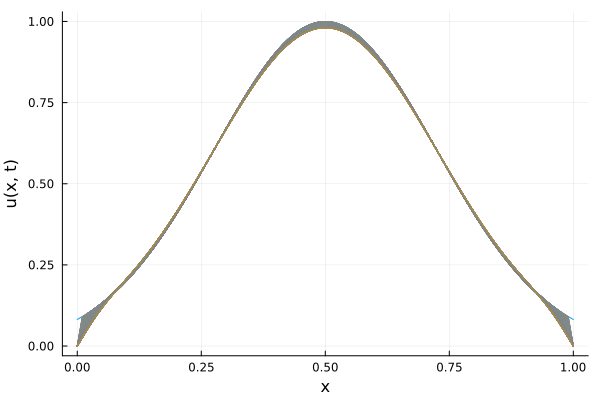

In [3]:
# Parámetros de la ecuación
nx = 100      # Número de puntos de la malla espacial
nt = 50      # Número de pasos de tiempo
L = 1.0       # Longitud del dominio espacial
T = 0.1       # Tiempo total de simulación
kappa = 0.01  # Coeficiente de difusión

# Resolvemos la ecuación de calor
x, u = solve_heat_equation_1d(nx, nt, L, T, kappa)

# Graficamos los resultados usando Plots
plot(x, u, xlabel="x", ylabel="u(x, t)", label=[string("t = ", i * T / nt) for i in 0:nt])